# $k$ - medias: Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (8,4)

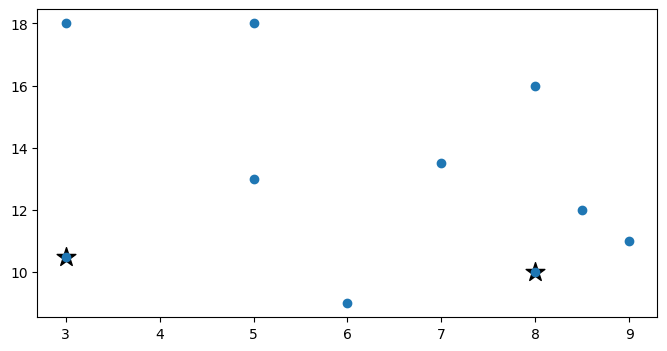

In [2]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
C = np.array([[8, 10], [3, 10.5]])
# EDA: gráfica
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'k', s = 200)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [3]:
# 1. Asignación de cada muestra a un grupo, representado por los centroides.
# Esto se traduce como el cálculo de las distancias mínimas a éstos.
distancias = []
grupos = np.zeros(len(data))

def dist(a, b, axis = 1):
    return np.linalg.norm(a - b, axis = axis)

for i in range(len(data)):
    distancia = dist(data[i], C)
    distancias.append(distancia)
    grupo = np.argmin(distancia)
    grupos[i] = grupo

display(grupos, distancias)

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 0.])

[array([0.        , 5.02493781]),
 array([5.02493781, 0.        ]),
 array([3.64005494, 5.        ]),
 array([8.54400375, 7.76208735]),
 array([4.24264069, 3.20156212]),
 array([2.23606798, 3.35410197]),
 array([1.41421356, 6.02079729]),
 array([9.43398113, 7.5       ]),
 array([2.06155281, 5.70087713]),
 array([6.        , 7.43303437])]

In [4]:
# 2. Recalcular centroides
for i in range(len(C)):
    puntos = np.array([data[j] for j in range(len(data)) if grupos[j] == i])
    print(i, puntos.shape, '\n', puntos, '\n')
    C[i] = np.mean(puntos, axis = 0)

display(C)

0 (6, 2) 
 [[ 8.  10. ]
 [ 7.  13.5]
 [ 6.   9. ]
 [ 9.  11. ]
 [ 8.5 12. ]
 [ 8.  16. ]] 

1 (4, 2) 
 [[ 3.  10.5]
 [ 5.  18. ]
 [ 5.  13. ]
 [ 3.  18. ]] 



array([[ 7.75      , 11.91666667],
       [ 4.        , 14.875     ]])

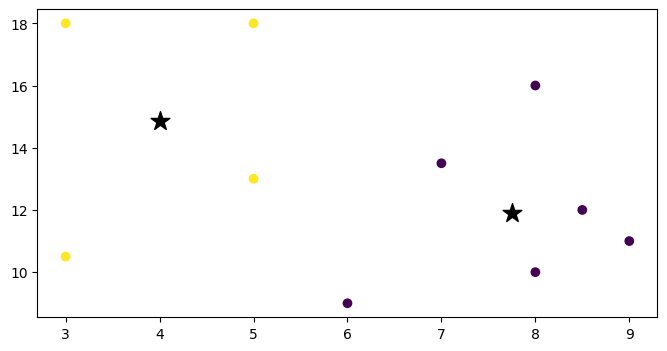

In [5]:
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'k', s = 200)
plt.scatter(data[:, 0], data[:, 1],c = grupos)
plt.show()

Se debe recalcular hasta que los centroides o grupos no cambien. En este caso, esta ya es la solución óptima. Nótese qué sucede al cambiar los centroides:

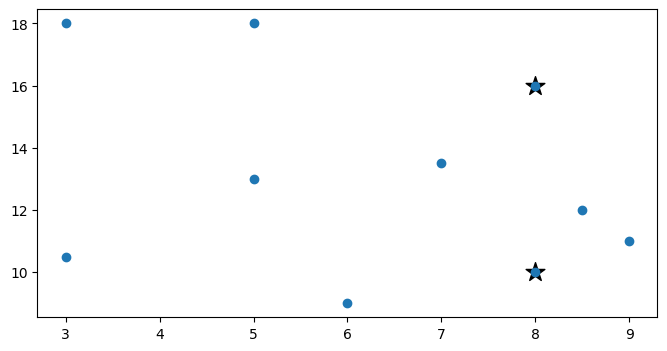

In [6]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
C = np.array([[8, 10], [8, 16]])
# EDA: gráfica
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'k', s = 200)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

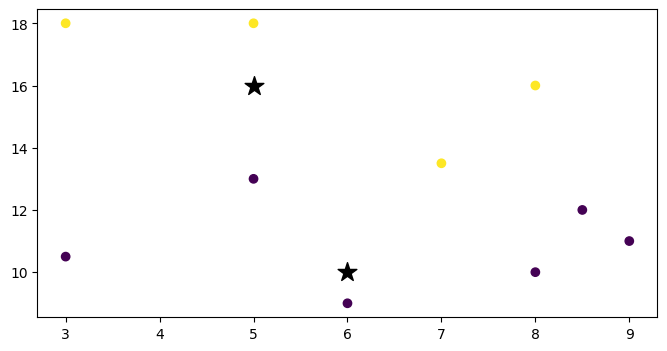

In [7]:
# 1. Asignación de cada muestra a un grupo, representado por los centroides.
# Esto se traduce como el cálculo de las distancias mínimas a éstos.
distancias = []
grupos = np.zeros(len(data))

def dist(a, b, axis = 1):
    return np.linalg.norm(a - b, axis = axis)

for i in range(len(data)):
    distancia = dist(data[i], C)
    distancias.append(distancia)
    grupo = np.argmin(distancia)
    grupos[i] = grupo

#display(grupos, distancias)

# 2. Recalcular centroides
for i in range(len(C)):
    puntos = np.array([data[j] for j in range(len(data)) if grupos[j] == i])
    #print(i, puntos.shape, '\n', puntos, '\n')
    C[i] = np.mean(puntos, axis = 0)

#display(C)

plt.scatter(C[:, 0], C[:, 1], marker = '*', c = 'k', s = 200)
plt.scatter(data[:, 0], data[:, 1], c = grupos)
plt.show()

Por ende, es no determinista *(sensible a las inicializaciones, devuelve soluciones sub-óptimas)*, pero tiene pocas soluciones posibles. Se puede repetir con diversos centroides y se toman los centroides óptimos resultantes más frecuentes. Sin embargo, no es sensible al número de grupos.

In [8]:
# Modo BootCamp con Sklearn
import pandas as pd
plt.rcParams['figure.figsize'] = (6,3)

data = pd.read_csv('https://bit.ly/3BxsIDR')
data.tail(2)

,rownames,V1,V2
2998,2999,90.72282,-12.25584
2999,3000,64.87976,-24.87731


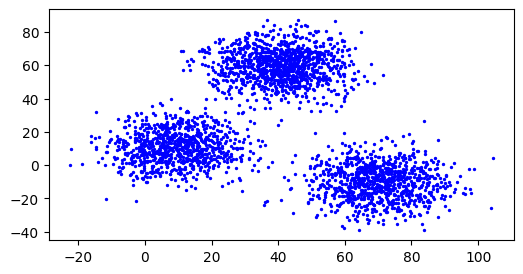

In [9]:
x1, x2 = data['V1'].values, data.V2.values
plt.scatter(x1, x2, c = 'blue', s = 2)
plt.show()

In [10]:
from sklearn.cluster import KMeans
X = np.array(list(zip(x1, x2)))
km = KMeans(n_clusters = 3, n_init = 'auto')
km.fit(X)
y_pred = km.predict(X)
C = km.cluster_centers_

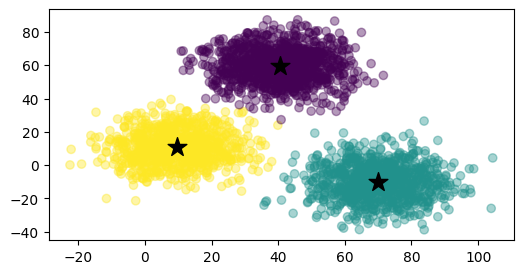

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.4)
plt.scatter(C[:, 0], C[:, 1], c = 'k', s = 200, marker = '*')
plt.show()

In [12]:
# Determinar valor de k: Gráfica de "codo" "desde cero"
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples = 1000, n_features = 12, centers = 8, random_state = 42)

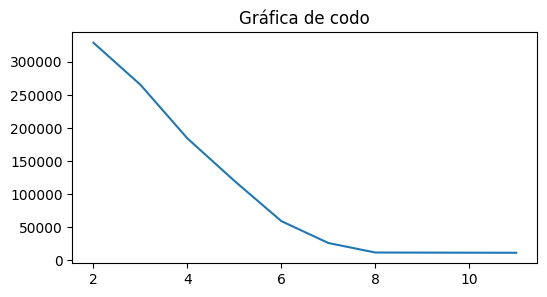

In [13]:
# Modelos y métrica
wcss = [] # Within Clusters Sum of Squares
for i in range(2, 12):
    km = KMeans(n_clusters = i, n_init = 'auto', init = 'k-means++', random_state = 0) # Investiga la guía sobre el viajero intergaláctico para averiguar el origen del número 42 como random_state.
    km.fit(X)
    wcss.append(km.inertia_)
# Visualizacióm
plt.plot(range(2, 12), wcss)
plt.title('Gráfica de codo')
plt.show()

In [14]:
!pip install yellowbrick

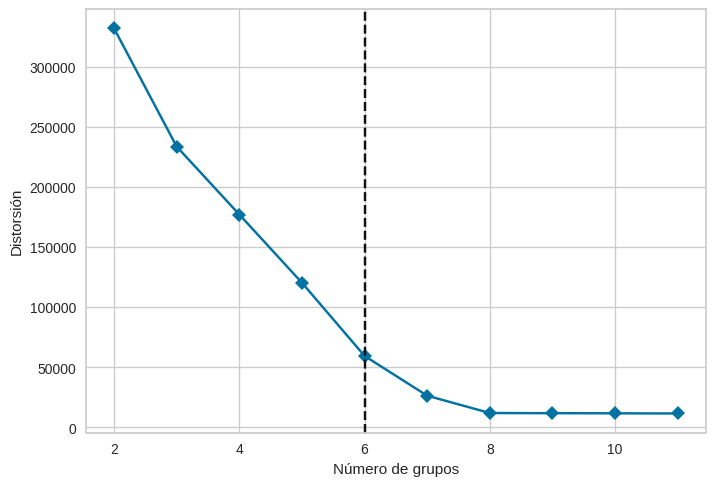

In [15]:
from yellowbrick.cluster import KElbowVisualizer
vis = KElbowVisualizer(KMeans(n_init = 'auto'), k = (2, 12), timings = False)
vis.fit(X)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()